In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('survey.csv')

# Content
# This dataset contains the following data:

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?

**phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?

**mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments

**Inspiration**
Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

In [ ]:
print(df)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [ ]:
gen = df.iloc[:,2:3]
print(gen)

      Gender
0     Female
1          M
2       Male
3       Male
4       Male
...      ...
1254    male
1255    Male
1256    male
1257       f
1258    Male

[1259 rows x 1 columns]


In [ ]:
x=0
y=0
z=0

for i in range(len(gen)):
    gender_str = str(gen.iloc[i, 0]).strip().lower()
    if gender_str.startswith('m') :
        gen.iloc[i,0]='M'
        x=x+1
    elif gender_str.startswith('f'):
        gen.iloc[i,0]='F'
        y=y+1
    else:
        gen.iloc[i,0]='O'
        z=z+1


print(x)
print(y)
print(z)


988
244
27


In [ ]:
df.iloc[:,2:3]=gen
print(df)

                Timestamp  Age Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37      F   United States    IL           NaN   
1     2014-08-27 11:29:37   44      M   United States    IN           NaN   
2     2014-08-27 11:29:44   32      M          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31      M  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31      M   United States    TX           NaN   
...                   ...  ...    ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26      M  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32      M   United States    IL            No   
1256  2015-11-07 12:36:58   34      M   United States    CA            No   
1257  2015-11-30 21:25:06   46      F   United States    NC            No   
1258  2016-02-01 23:04:31   25      M   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0     

In [ ]:
title = df.iloc[0,:]
print(title)

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                         F
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [ ]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]

In [ ]:
j=0
for i in range(len(df)):
    if df.iloc[i, 2]=='O':
      j=j+1

print(j)

24


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,513
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0


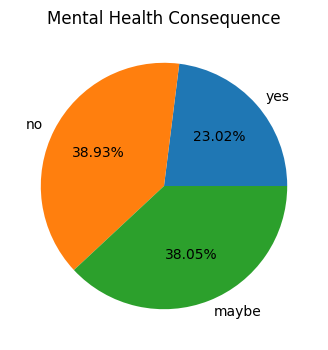

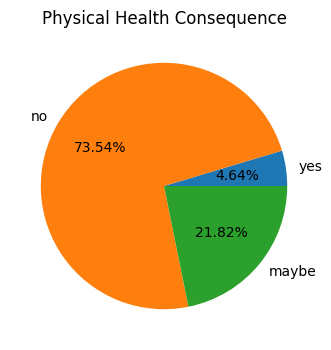

In [ ]:

#mental health consequence
labl = ['yes', 'no', 'maybe']
y=0
n=0
m=0

for i in range(len(df)):
  if df.iloc[i,18] =='Yes' :
    y=y+1

  elif df.iloc[i,18] =='No' :
    n=n+1

  else:
    m=m+1
data=[y,n,m]
fig = plt.figure(figsize = (4,4))
plt.title('Mental Health Consequence')

plt.pie(data, labels = labl, autopct = '%2.2f%%')

plt.show()

#physical health consequence
labl = ['yes', 'no', 'maybe']
y=0
n=0
m=0
for i in range(len(df)):
  if df.iloc[i,19] =='Yes' :
    y=y+1

  elif df.iloc[i,19] =='No' :
    n=n+1

  else:
    m=m+1
data=[y,n,m]
fig = plt.figure(figsize = (4,4))
plt.title('Physical Health Consequence')
plt.pie(data, labels = labl, autopct = '%2.2f%%', )

plt.show()

CHART 1


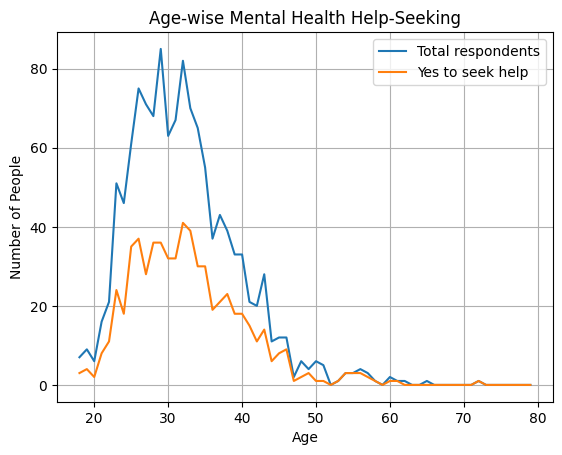

CHART 2


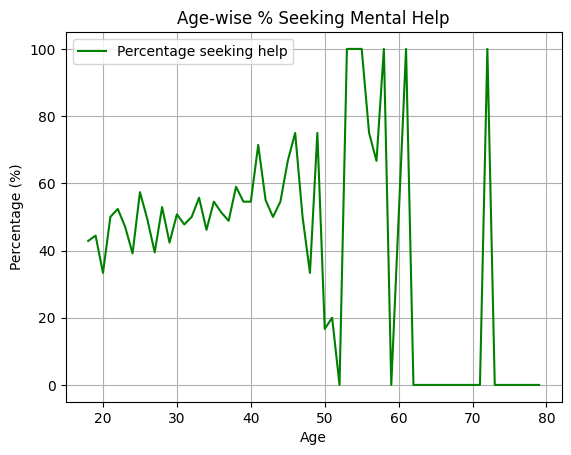

In [ ]:
#Age wise trend of seeking mental help
x= np.arange(18,80,1)
y=np.repeat(0,62)
a=np.repeat(0,62)
b=np.repeat(0,62)
for i in range(len(df)):
  z=df.iloc[i,1]
  a[z-18]=a[z-18]+1
  if df.iloc[i,7]=='Yes':
    #print(z)
    y[z-18]=y[z-18]+1


print('CHART 1')
b = np.divide(y, a, out=np.zeros_like(y, dtype=float), where=a != 0) * 100
plt.plot(x, a, linestyle='solid', label='Total respondents')
plt.plot(x, y, linestyle='solid', label='Yes to seek help')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age-wise Mental Health Help-Seeking')
plt.legend()
plt.grid(True)
plt.show()

print('CHART 2')
plt.plot(x, b, linestyle='solid', color='green', label='Percentage seeking help')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.title('Age-wise % Seeking Mental Help')
plt.legend()
plt.grid(True)
plt.show()

The above 2 graphs indicates that people between the age of 25 to 35 have highest number of respondants peaking at the age of 30. Also the number of individuals seeking mental help is lagest between 25-35. Hence this suggests that this age group is the most active in responding as well as seeking help. Beyond 40 both the lines in chart 1 are dropping significantly indicating that there are fewer people responding and even fewer seeking help. The gap between 2 lines in the 1st chart indicates that many people do not seek help even in high respondant groups.
In the second chart, there is a stable 40-60% of people seeking help uptill the age of 45. The graph then fluctuates abruptly due to lesser due to small sample size in those age groups. There is an increase in % from 35 to 45 suggesting increased awareness or need in that age group.

| Column Name                     | Why It’s Important                                         | Type of Insight You Can Derive                   |
| ------------------------------- | ---------------------------------------------------------- | ------------------------------------------------ |
| **Age**                         | Age-wise trends in seeking help or mental health awareness | Younger vs older employee behavior               |
| **Gender**                      | Gender-based differences in treatment seeking & stigma     | Male vs Female vs Other mental health perception |
| **Country**                     | Cultural/structural differences in support systems         | Global mental health disparities                 |
| **self\_employed**              | Access to resources vs structured company benefits         | Freelancers vs employees' challenges             |
| **family\_history**             | Personal mental health background                          | Correlation with seeking treatment               |
| **treatment** (**Target**)      | Main variable you're predicting or analyzing               | Who seeks treatment and why                      |
| **work\_interfere**             | How mental health affects work                             | Impact of mental health on productivity          |
| **no\_employees**               | Company size and mental health policies                    | Do large companies offer better support?         |
| **remote\_work**                | Isolation vs flexibility                                   | Remote work's impact on mental wellness          |
| **tech\_company**               | Workplace culture relevance                                | Is tech better or worse for mental health?       |
| **benefits**                    | Employer-provided mental health benefits                   | Do benefits reduce the stigma or help seeking?   |
| **care\_options**               | Availability of care options                               | Awareness vs accessibility gap                   |
| **wellness\_program**           | Proactive company mental health efforts                    | Are wellness programs effective?                 |
| **seek\_help**                  | Encouragement to seek help at work                         | Company support perception                       |
| **anonymity**                   | Fear of judgment while seeking help                        | Trust issues with employer                       |
| **leave**                       | How easy is it to take time off for mental health          | Company policy effectiveness                     |
| **mental\_health\_consequence** | Perceived career risks                                     | Workplace stigma level                           |
| **phys\_health\_consequence**   | Compare physical vs mental health stigma                   | Relative stigma perception                       |
| **coworkers / supervisor**      | Support system at workplace                                | Influence of team/management support             |
| **mental\_health\_interview**   | Willingness to disclose during interviews                  | Employer openness and candidate fear             |
| **mental\_vs\_physical**        | Equality in how mental and physical health are viewed      | Cultural bias                                    |
| **obs\_consequence**            | Observable consequences at work                            | Perceived impact of mental health on performance |


CHART 1


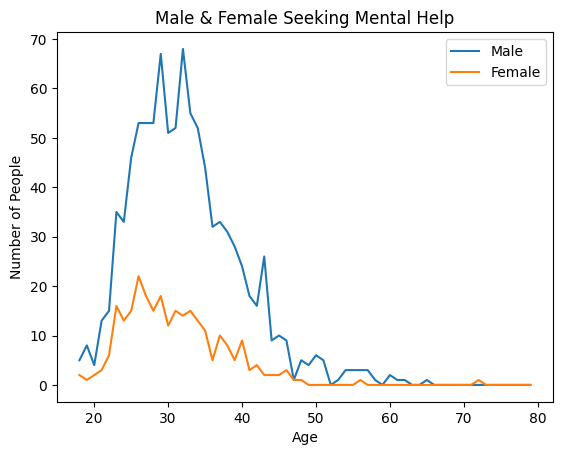

CHART 2


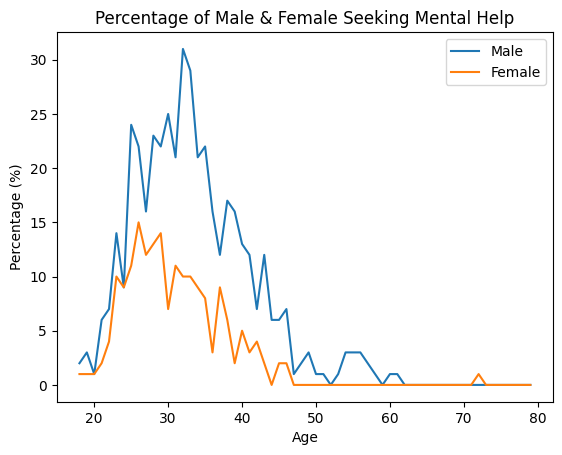

In [ ]:
f=np.repeat(0,62)
m=np.repeat(0,62)
f_y=np.repeat(0,62)
m_y=np.repeat(0,62)

for i in range(len(df)):
  z=df.iloc[i,1]
  if df.iloc[i,2]=='M':
    #print(z)
    m[z-18]=m[z-18]+1
    if(df.iloc[i,7]=='Yes'):
      m_y[z-18]=m_y[z-18]+1
  else :
    f[z-18]=f[z-18]+1
    if(df.iloc[i,7]=='Yes'):
      f_y[z-18]=f_y[z-18]+1

b_f=np.divide(f_y, f, out=np.zeros_like(f_y, dtype=float), where=f != 0) * 100
b_m=np.divide(m_y, m, out=np.zeros_like(m_y, dtype=float), where=m != 0) * 100
print('CHART 1')
plt.plot(x, m, linestyle='solid', label='Male')
plt.plot(x, f, linestyle='solid', label='Female')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Male & Female Seeking Mental Help')
plt.legend()
plt.show()

print('CHART 2')
plt.plot(x, m_y, linestyle='solid', label='Male')
plt.plot(x, f_y, linestyle='solid', label='Female')
plt.title('Percentage of Male & Female Seeking Mental Help')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()


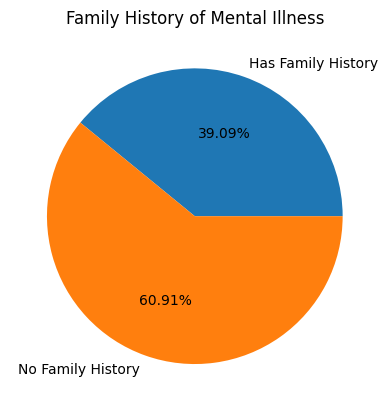

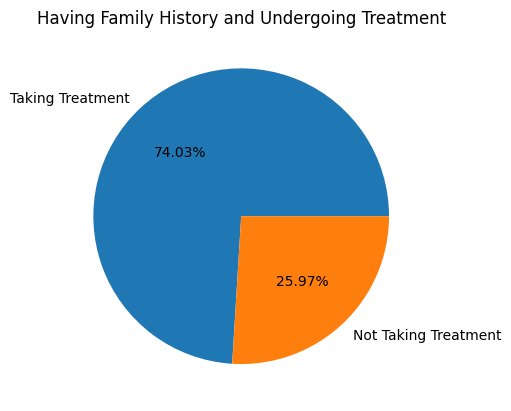

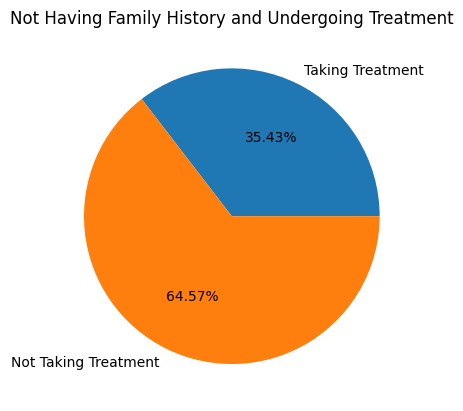

In [ ]:
f_y=0
f_yy=0
f_yn=0
f_n=0
f_ny=0
f_nn=0
for i in range (len(df)):
  if df.iloc[i,6]=='Yes':
    f_y+=1
    if df.iloc[i,7]=='Yes':
      f_yy+=1
    else:
      f_yn+=1
  else:
    f_n+=1
    if df.iloc[i,7]=='Yes':
      f_ny+=1
    else:
      f_nn+=1
label=['Has Family History', 'No Family History']
data=[f_y, f_n]
plt.pie(data, labels=label, autopct='%2.2f%%')
plt.title('Family History of Mental Illness')
plt.show()

label=['Taking Treatment', 'Not Taking Treatment']
data=[f_yy, f_yn]
plt.pie(data, labels=label, autopct='%2.2f%%')
plt.title('Having Family History and Undergoing Treatment')
plt.show()

label=['Taking Treatment', 'Not Taking Treatment']
data=[f_ny, f_nn]
plt.pie(data, labels=label, autopct='%2.2f%%')
plt.title('Not Having Family History and Undergoing Treatment')
plt.show()

<ipython-input-180-d590625cef11>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_subset.applymap(lambda x: mapping.get(x, 0))


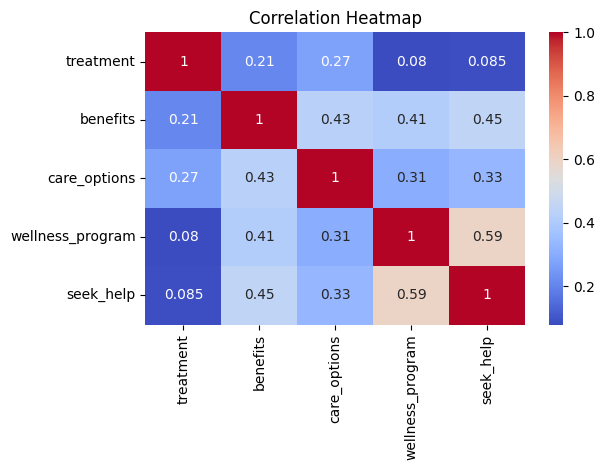

['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [ ]:
import seaborn as sns

df_subset = df[['treatment', 'benefits', 'care_options', 'wellness_program', 'seek_help']]
mapping = {'Yes': 1, 'No': 0, 'Not sure': 0}
df_encoded = df_subset.applymap(lambda x: mapping.get(x, 0))
corr_matrix = df_encoded.corr()

# Example: Assuming you have a correlation matrix named `corr_matrix`
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
print(df.columns.tolist())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
s=0
for i in range(len(df)):
  if df.iloc[i,7]=='Yes':
    s=s+1
print(s)
for i in range(len(df)):
  if df.iloc[i,2]=='M':
    df.iloc[i,2]=0
  elif df.iloc[i,2]=='F':
    df.iloc[i,2]=1
  elif df.iloc[i,2]=='O':
    df.iloc[i,2]=2

for i in range(len(df)):
  if df.iloc[i,6]=='No':
    df.iloc[i,6]=0
  elif df.iloc[i,6]=='Yes':
    df.iloc[i,6]=1

for i in range(len(df)):
  if df.iloc[i,6]=='No':
    df.iloc[i,6]=0
  elif df.iloc[i,6]=='Yes':
    df.iloc[i,6]=1

for i in range(len(df)):
  if df.iloc[i,15]=='No':
    df.iloc[i,15]=0
  elif df.iloc[i,15]=='Yes':
    df.iloc[i,15]=1
  elif df.iloc[i,15]=="Don't know":
    df.iloc[i,15]=-1

for i in range(len(df)):
  if df.iloc[i,12]=='No':
    df.iloc[i,12]=0
  elif df.iloc[i,12]=='Yes':
    df.iloc[i,12]=1
  elif df.iloc[i,12]=="Don't know":
    df.iloc[i,12]=-1

for i in range(len(df)):
  if df.iloc[i,13]=='No':
    df.iloc[i,13]=0
  elif df.iloc[i,13]=='Yes':
    df.iloc[i,13]=1
  elif df.iloc[i,13]=="Not sure":
    df.iloc[i,13]=-1

for i in range(len(df)):
  if df.iloc[i,14]=='No':
    df.iloc[i,14]=0
  elif df.iloc[i,14]=='Yes':
    df.iloc[i,14]=1
  elif df.iloc[i,14]=="Don't know":
    df.iloc[i,14]=-1

features = ['Age', 'Gender','family_history', 'benefits', 'care_options', 'wellness_program']
X = df[features]
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


632


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6892430278884463
              precision    recall  f1-score   support

          No       0.63      0.75      0.69       113
         Yes       0.76      0.64      0.69       138

    accuracy                           0.69       251
   macro avg       0.69      0.69      0.69       251
weighted avg       0.70      0.69      0.69       251

